# LinkedIn


## Setup


In [22]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Utilities


In [23]:
def load_parquet(file_path):
    """
    This function loads a parquet file directly if it exists. If a CSV file is provided,
    it checks for an existing corresponding parquet file. If the parquet file does not exist,
    it converts the CSV to parquet and saves it with a '.parquet.gzip' extension, then loads it.

    Parameters:
    - file_path: str, the path to the input file (either .csv or .parquet.gzip)

    Returns:
    - DataFrame loaded from the parquet file.
    """
    path = Path(file_path)

    if path.suffix == ".csv":
        parquet_path = path.with_suffix(".parquet.gzip")

        if not parquet_path.exists():
            df = pd.read_csv(path)
            df.to_parquet(parquet_path, compression="gzip")
        else:
            print(f"Parquet file already exists for {file_path}, loading it directly.")
    elif path.suffix == ".gzip" and path.suffixes[-2] == ".parquet":
        parquet_path = path
    else:
        raise ValueError(
            "Unsupported file format. Please provide a .csv or .parquet.gzip file."
        )

    return pd.read_parquet(parquet_path)

## Data


In [14]:
# Dataset: https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024

job_skills_df = load_parquet(
    "./datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024/job_skills.csv"
)
job_summaries_df = load_parquet(
    "./datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024/job_summary.csv"
)
job_postings_df = load_parquet(
    "./datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024/linkedin_job_postings.csv"
)

In [15]:
jobs_df = job_postings_df[
    [
        "job_title",
        "company",
        "job_location",
        "search_city",
        "search_country",
        "search_position",
        "job_level",
        "job_type",
        "first_seen",
        "last_processed_time",
        "job_link",
    ]
]

In [16]:
skills_df = job_skills_df[["job_link"]]
skills_df["job_skills"] = job_skills_df["job_skills"].str.split(", ")
skills_df = skills_df.set_index("job_link").explode("job_skills")

In [17]:
company_job_openings = jobs_df["company"].value_counts()

In [18]:
jobs_df["job_level"]

0          Mid senior
1          Mid senior
2          Mid senior
3          Mid senior
4          Mid senior
              ...    
1348449    Mid senior
1348450    Mid senior
1348451    Mid senior
1348452    Mid senior
1348453    Mid senior
Name: job_level, Length: 1348454, dtype: object

## Questions


### What companies have the most job openings?


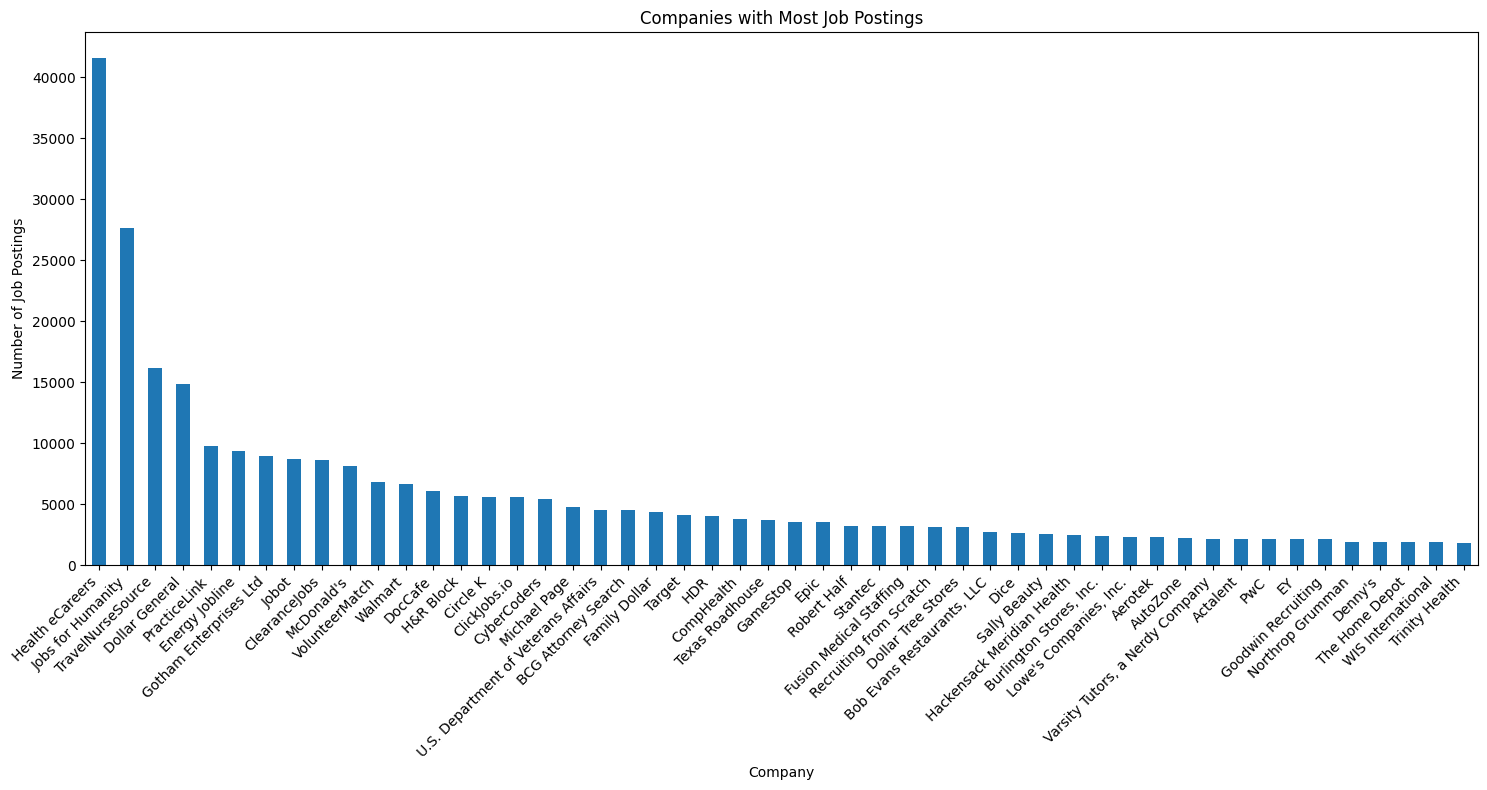

In [19]:
top_50_companies = company_job_openings.head(50)
plt.figure(figsize=(15, 8))
top_50_companies.plot(kind="bar")
plt.title("Companies with Most Job Postings")
plt.xlabel("Company")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### What are the most requested job levels?


### What are the most requested job titles?
